In [92]:
import pandas as pd

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [94]:
from textblob import TextBlob
from transformers import pipeline

In [95]:
data = pd.read_csv("/content/HIT_Futurelab_2025 (Responses) - Sheet2.csv")

In [96]:
data.head()

,Timestamp,Was ist dein Lieblingssnack,Welche Social Media Plattform nutzt du am meisten?,"Andere, und zwar...",Wann bist du auf Social Media am aktivsten,Welche Art von Inhalten schaust du dir am häufigsten an?,Wie viele Stunden verbringst du täglich (in etwa im Durchschnitt) auf Social Media,In welchem Jahr wurdest du geboren (XXXX z.B. 2010),Geschlecht,"Welche Gefühle verbindest du mit Social Media? Gibt es Situationen, in denen du dich besonders gut oder schlecht fühlst?"
0,3/28/2025 22:07:36,Kekse,Youtube,NaN,Abends,"Bildung (z. B. Tutorials, Dokus)",1,2010,Weiblich,NaN
1,3/28/2025 22:08:02,Schokolade,Instagram,NaN,Vormittags,"Unterhaltung (z. B. Memes, Comedy)",2,2011,Männlich,NaN
2,3/28/2025 22:08:57,Schokolade,Instagram,NaN,Abends,"Bildung (z. B. Tutorials, Dokus)",1,2012,Weiblich,NaN
3,3/28/2025 22:29:42,Kekse,Youtube,NaN,Vormittags,"Unterhaltung (z. B. Memes, Comedy)",3,2011,Männlich,NaN
4,3/28/2025 22:30:24,Schokolade,Instagram,NaN,Vormittags,"Unterhaltung (z. B. Memes, Comedy)",1,2012,Weiblich,NaN


In [97]:
print(data.columns)

Index(['Timestamp', 'Was ist dein Lieblingssnack',
       'Welche Social Media Plattform nutzt du am meisten?',
       'Andere, und zwar...', 'Wann bist du auf Social Media am aktivsten',
       'Welche Art von Inhalten schaust du dir am häufigsten an?',
       'Wie viele Stunden verbringst du täglich (in etwa im Durchschnitt) auf Social Media',
       'In welchem Jahr wurdest du geboren (XXXX z.B. 2010)', 'Geschlecht',
       'Welche Gefühle verbindest du mit Social Media? Gibt es Situationen, in denen du dich besonders gut oder schlecht fühlst?  '],
      dtype='object')


In [98]:
data.rename(columns={
    'Timestamp': 'Timestamp',
    'Was ist dein Lieblingssnack': 'Snack',
    'Welche Social Media Plattform nutzt du am meisten?': 'Plattform',
    'Andere, und zwar...': 'Andere',
    'Wann bist du auf Social Media am aktivsten': 'Zeit',
    'Welche Art von Inhalten schaust du dir am häufigsten an?': 'Contentart',
    'Wie viele Stunden verbringst du täglich (in etwa im Durchschnitt) auf Social Media': 'Stunden_SM',
    'In welchem Jahr wurdest du geboren (XXXX z.B. 2010)': 'Geburtsjahr',
    'Geschlecht': 'Geschlecht',
    'Welche Gefühle verbindest du mit Social Media? Gibt es Situationen, in denen du dich besonders gut oder schlecht fühlst?  ': 'Gefuehle_SM'
}, inplace=True)

In [99]:
data_cleaned = data.drop(index=range(0,2))

In [100]:
data.tail()

,Timestamp,Snack,Plattform,Andere,Zeit,Contentart,Stunden_SM,Geburtsjahr,Geschlecht,Gefuehle_SM
2,3/28/2025 22:08:57,Schokolade,Instagram,NaN,Abends,"Bildung (z. B. Tutorials, Dokus)",1,2012,Weiblich,NaN
3,3/28/2025 22:29:42,Kekse,Youtube,NaN,Vormittags,"Unterhaltung (z. B. Memes, Comedy)",3,2011,Männlich,NaN
4,3/28/2025 22:30:24,Schokolade,Instagram,NaN,Vormittags,"Unterhaltung (z. B. Memes, Comedy)",1,2012,Weiblich,NaN
5,3/28/2025 23:12:39,Schokolade,Instagram,X,Abends,"Bildung (z. B. Tutorials, Dokus)",2,2009,Weiblich,"Meist währenddessen ganz gut, nur nachher etwa..."
6,3/28/2025 23:14:28,Obst,Tiktok,X,Morgens,Lifestyle/Mode,1,2009,Weiblich,Ach das passt eigentlich. Außer wenn ich es üb...


In [101]:
# Durchschnittliche Stunden auf Social Media
durchschnitt_stunden = data['Stunden_SM'].mean()
print(f"Durchschnittliche tägliche Nutzungsdauer auf Social Media: {durchschnitt_stunden} Stunden")

Durchschnittliche tägliche Nutzungsdauer auf Social Media: 1.5714285714285714 Stunden


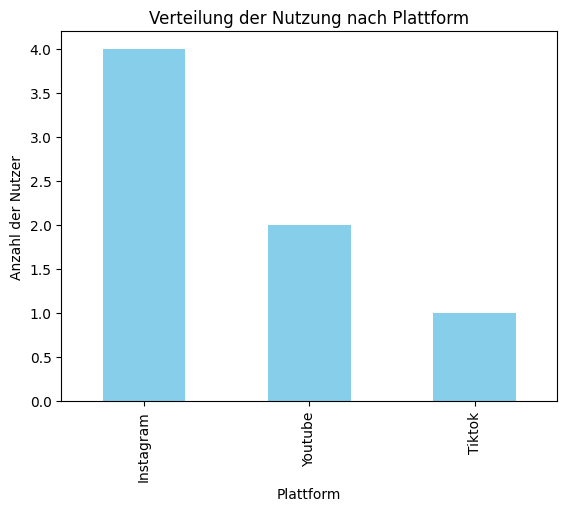

In [102]:
# Verteilung der Nutzung nach Plattform
plattform_verteilung = data['Plattform'].value_counts()

# Diagramm zur Verteilung der Plattformen
plattform_verteilung.plot(kind='bar', color='skyblue')
plt.title('Verteilung der Nutzung nach Plattform')
plt.xlabel('Plattform')
plt.ylabel('Anzahl der Nutzer')
plt.show()

In [103]:
# Berechnung des Durchschnittsalters
data['Alter'] = 2025 - data['Geburtsjahr']
durchschnittsalter = data['Alter'].mean()
print(f"Durchschnittsalter der Nutzer: {durchschnittsalter} Jahre")


Durchschnittsalter der Nutzer: 14.428571428571429 Jahre


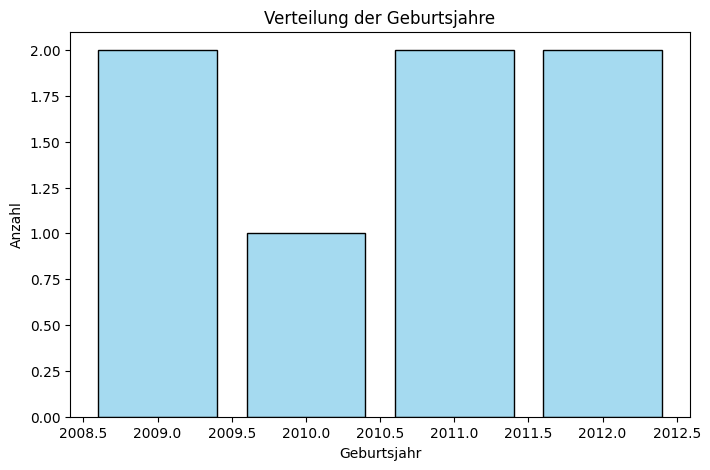

In [104]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Geburtsjahr', discrete=True, shrink=0.8, color='skyblue')
plt.title('Verteilung der Geburtsjahre')
plt.xlabel('Geburtsjahr')
plt.ylabel('Anzahl')
plt.show()

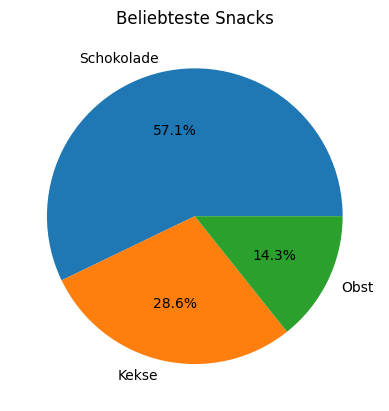

In [105]:
# Beliebteste Snacks
snack_verteilung = data['Snack'].value_counts()

# Diagramm zu beliebtesten Snacks
snack_verteilung.plot(kind='pie', autopct='%1.1f%%')
plt.title('Beliebteste Snacks')
plt.ylabel('')
plt.show()

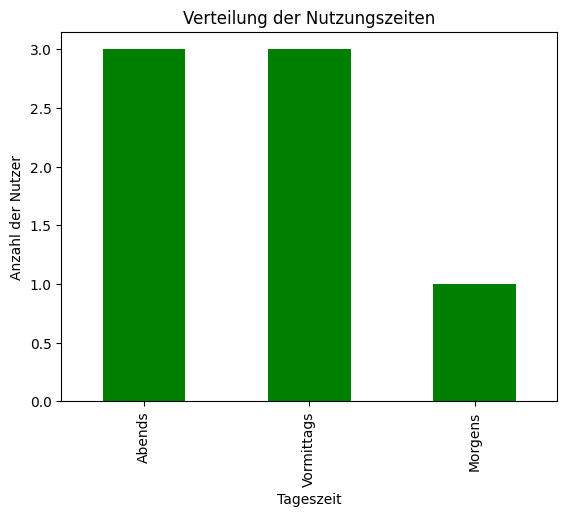

In [106]:
# Verteilung der Nutzungszeiten
zeit_verteilung = data['Zeit'].value_counts()

# Diagramm zur Verteilung der Nutzungszeiten
zeit_verteilung.plot(kind='bar', color='green')
plt.title('Verteilung der Nutzungszeiten')
plt.xlabel('Tageszeit')
plt.ylabel('Anzahl der Nutzer')
plt.show()

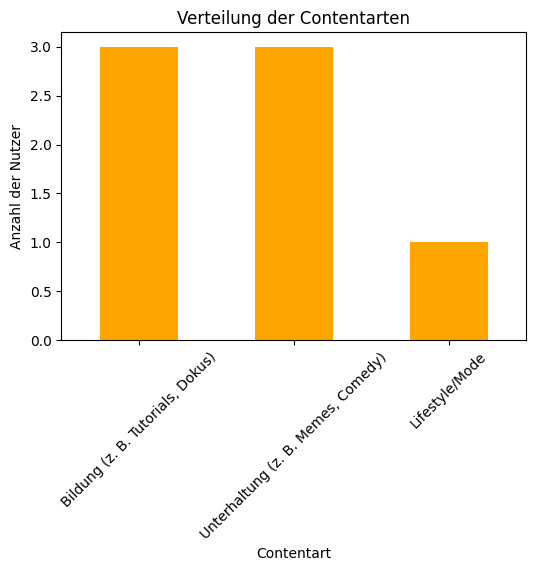

In [107]:
# Häufigkeitszählung der Contentarten
contentart_verteilung = data['Contentart'].value_counts()

# Diagramm zur Verteilung der Contentarten
plt.figure(figsize=(6, 4))  # Größenanpassung des Diagramms
contentart_verteilung.plot(kind='bar', color='orange')
plt.title('Verteilung der Contentarten')
plt.xlabel('Contentart')
plt.ylabel('Anzahl der Nutzer')
plt.xticks(rotation=45)  # Dreht die X-Achsen-Beschriftungen für bessere Lesbarkeit
plt.show()

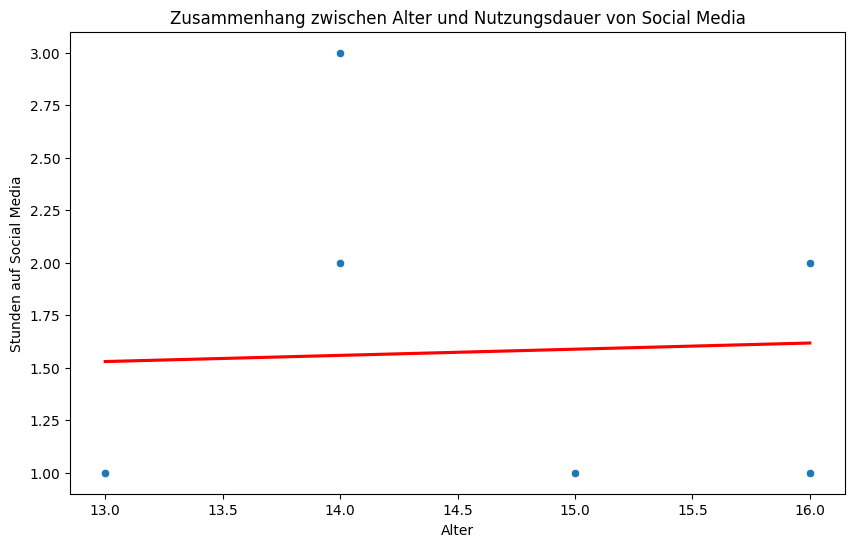

Pearson-Korrelationskoeffizient: 0.04756514941544937, p-Wert: 0.9193422085515752
Kein signifikanter Zusammenhang zwischen dem Alter und der Nutzungsdauer von Social Media.


In [108]:
# Berechnung des Alters aus dem Geburtsjahr
data['Alter'] = 2025 - data['Geburtsjahr']

# Scatter Plot der Daten
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Alter', y='Stunden_SM')

# Linie der besten Anpassung hinzufügen
sns.regplot(data=data, x='Alter', y='Stunden_SM', scatter=False, color='red', ci=None)
plt.title('Zusammenhang zwischen Alter und Nutzungsdauer von Social Media')
plt.xlabel('Alter')
plt.ylabel('Stunden auf Social Media')
plt.show()

# Pearson Korrelationskoeffizient und p-Wert
correlation, p_value = stats.pearsonr(data['Alter'], data['Stunden_SM'])
print(f"Pearson-Korrelationskoeffizient: {correlation}, p-Wert: {p_value}")

# Interpretation des Ergebnisses
if p_value < 0.05:
    print("Es besteht ein signifikanter Zusammenhang zwischen dem Alter und der Nutzungsdauer von Social Media.")
else:
    print("Kein signifikanter Zusammenhang zwischen dem Alter und der Nutzungsdauer von Social Media.")

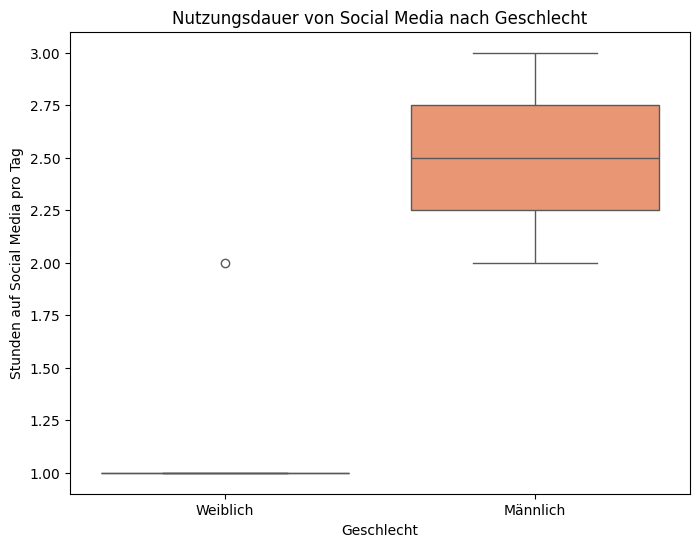

T-Statistik: 3.0472470011002204, p-Wert: 0.02851377233653793
Es gibt einen signifikanten Unterschied in der Nutzungsdauer zwischen männlichen und weiblichen Nutzern.


In [109]:
# Aufteilung der Daten nach Geschlecht
stunden_m = data[data['Geschlecht'] == 'Männlich']['Stunden_SM']
stunden_w = data[data['Geschlecht'] == 'Weiblich']['Stunden_SM']

# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Geschlecht', y='Stunden_SM', hue='Geschlecht', palette='Set2', legend=False)
plt.title('Nutzungsdauer von Social Media nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Stunden auf Social Media pro Tag')
plt.show()

# t-Test
t_stat, p_value = stats.ttest_ind(stunden_m, stunden_w)
print(f"T-Statistik: {t_stat}, p-Wert: {p_value}")

# Interpretation des Ergebnisses
if p_value < 0.05:
    print("Es gibt einen signifikanten Unterschied in der Nutzungsdauer zwischen männlichen und weiblichen Nutzern.")
else:
    print("Kein signifikanter Unterschied in der Nutzungsdauer zwischen den Geschlechtern.")

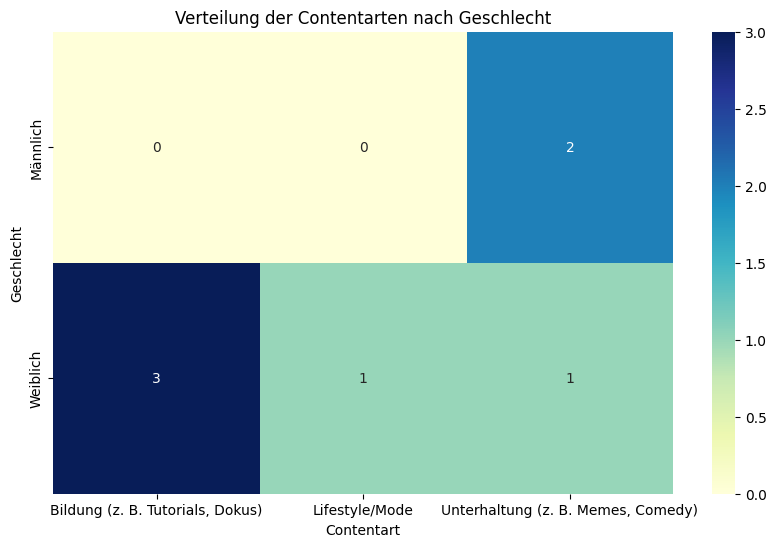

Chi2-Wert: 3.7333333333333334, p-Wert: 0.1546382645492548
Kein signifikanter Zusammenhang zwischen Geschlecht und bevorzugter Contentart.


In [110]:
# Kreuztabelle erstellen
contingency_table = pd.crosstab(data['Geschlecht'], data['Contentart'])

# Heatmap der Kreuztabelle
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Verteilung der Contentarten nach Geschlecht')
plt.xlabel('Contentart')
plt.ylabel('Geschlecht')
plt.show()

# Chi-Quadrat-Test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2-Wert: {chi2}, p-Wert: {p_value}")

# Interpretation des Ergebnisses
if p_value < 0.05:
    print("Signifikanter Zusammenhang zwischen Geschlecht und bevorzugter Contentart.")
else:
    print("Kein signifikanter Zusammenhang zwischen Geschlecht und bevorzugter Contentart.")


In [111]:
# Entferne Zeilen, wo die Anzahl der Stunden auf Social Media unrealistisch hoch ist
data2 = data[data['Stunden_SM'] <= 24]

In [112]:
# Neue Spalte für das Sentiment anlegen
def get_sentiment(text):
    if pd.isnull(text):
        return None
    return TextBlob(text).sentiment.polarity  # gibt Wert zwischen -1 (negativ) und +1 (positiv)

# Anwenden auf die Spalte
data['Sentiment'] = data['Gefuehle_SM'].apply(get_sentiment)

# Ergebnisse anzeigen
print(data[['Gefuehle_SM', 'Sentiment']].dropna())

                                         Gefuehle_SM  Sentiment
5  Meist währenddessen ganz gut, nur nachher etwa...        0.0
6  Ach das passt eigentlich. Außer wenn ich es üb...        0.0


In [121]:
print(TextBlob("Ich liebe Social Media").sentiment)

Sentiment(polarity=0.03333333333333333, subjectivity=0.06666666666666667)


In [113]:
# Lade das deutsche Sentimentanalyse-Modell
sentiment_pipeline = pipeline("sentiment-analysis", model="oliverguhr/german-sentiment-bert")

# Wende es auf die Spalte an
def analyze_sentiment(text):
    if pd.isnull(text) or not text.strip():
        return None
    result = sentiment_pipeline(text[:512])[0]  # max. 512 Token
    return result['label']

# Neue Spalte mit Sentiment-Label hinzufügen
data['Sentiment_Label'] = data['Gefuehle_SM'].apply(analyze_sentiment)

# Ergebnisse ansehen
print(data[['Gefuehle_SM', 'Sentiment_Label']].dropna())

Device set to use cpu


                                         Gefuehle_SM Sentiment_Label
5  Meist währenddessen ganz gut, nur nachher etwa...        positive
6  Ach das passt eigentlich. Außer wenn ich es üb...        negative


In [114]:
for i, row in data[['Gefuehle_SM', 'Sentiment_Label']].dropna().iterrows():
    print(f"\nAntwort {i} ({row['Sentiment_Label']}):\n{row['Gefuehle_SM']}")


Antwort 5 (positive):
Meist währenddessen ganz gut, nur nachher etwas leer und gestresst

Antwort 6 (negative):
Ach das passt eigentlich. Außer wenn ich es übertreibe - dann geht's mir schon echt nicht mehr so gut.


In [115]:
def sentiment(text):
    if not text.strip():
        return None
    result = sentiment_pipeline(text[:512])[0]
    return result['label'].upper()  # gibt z.B. 'POSITIVE', 'NEUTRAL', 'NEGATIVE' zurück

In [120]:
print(sentiment("Meist währenddessen ganz gut, nur nachher etwas leer und gestresst"))

POSITIVE
